#  Dataset Introduction – Laptop Price Analysis
#  Project Title: Predicting Laptop Prices Using Machine Learning

# Dataset Overview:
This dataset contains 1,275 laptop models with 23 attributes, including specifications like brand, screen size, RAM, CPU, GPU, storage, and price in euros.

# Project Goal:
To build a predictive model that can estimate laptop prices based on key hardware specifications.

# Problem Statement:
Laptops come in various configurations, making it difficult for consumers to judge fair pricing. 
Our goal is to develop a data-driven pricing model that helps:

**Consumers: Compare laptops and find fair prices**

**Retailers: Set competitive laptop prices**

**Manufacturers: Identify key price-determining features**

# Machine Learning Approach:
**We'll use Linear Regression to build a model that predicts the price of a laptop based on its specifications.**



In [2]:
# Importing the Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Dataset Loading:
a=pd.read_csv("laptop_prices (1).csv")
a

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [5]:
# Data Understanding
a.shape

(1275, 23)

In [6]:
a.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [7]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [8]:
a.dtypes.value_counts()

object     14
int64       5
float64     4
Name: count, dtype: int64

<Axes: ylabel='count'>

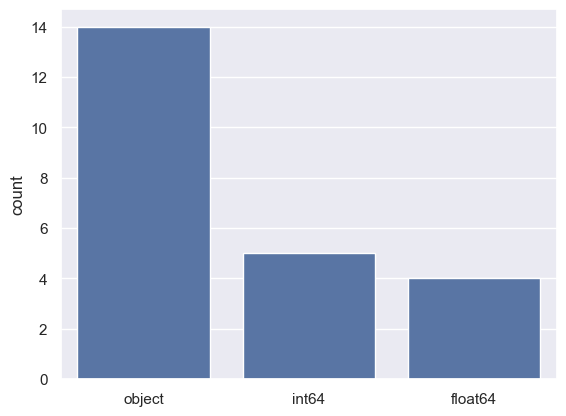

In [9]:
sns.barplot(data=a.dtypes.value_counts())

# Key Insights from Dataset Info
**No Missing Values: All 1,275 rows are complete.**
**Feature Types:**
* Numerical (9): Includes Price_euros, Ram, Weight, CPU_freq, ScreenW, ScreenH, etc.
* Categorical (14): Includes Company, OS, CPU_model, GPU_model, StorageType, etc.

**Potential Feature Engineering:**

**Convert Touchscreen, IPSpanel, and RetinaDisplay into binary (0/1).**

**One-hot encode categorical columns like Company, OS, CPU_company.**

**Screen Resolution (W x H) & Storage Types might impact price significantly.**


In [11]:
a.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [12]:
a.tail()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.0,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.0,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.0,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.0,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,4,Windows 10,2.20,369.0,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,500,0,HDD,No,Intel,HD Graphics


In [13]:
a.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


### Statistical Summary ###

**Price Range: €174 – €6099 (Avg: €1134.97, High Variance)**

**Screen Size: 10.1" – 18.4" (Avg: 15")**

**Resolution: Most laptops have 1920×1080 (Full HD), some 3840×2160 (4K UHD)**

**RAM: 2GB – 64GB (Avg: 8GB)**

**CPU Speed: 0.9 GHz – 3.6 GHz (Avg: 2.3 GHz)**

**Weight: 0.69kg – 4.7kg (Avg: 2.04kg)**

**Storage: Primary: 8GB – 2TB (Avg: 444GB) Secondary: Mostly 0GB, but some up to 2TB**

### Key Insights ###
**Price is highly variable, driven by brand, specs & features.**

**Full HD is standard, but 4K screens exist in high-end models.** 

**RAM & Storage are key price influencers, especially above 8GB RAM.** 

**Most laptops have no secondary storage, except high-end ones.**

**Lighter laptops tend to be premium, heavier ones are gaming models.** 

# Data Inspection

In [17]:
a.isnull().sum() # check the missing values

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [18]:
a.duplicated().sum()

0

In [19]:
# Check the Outliers

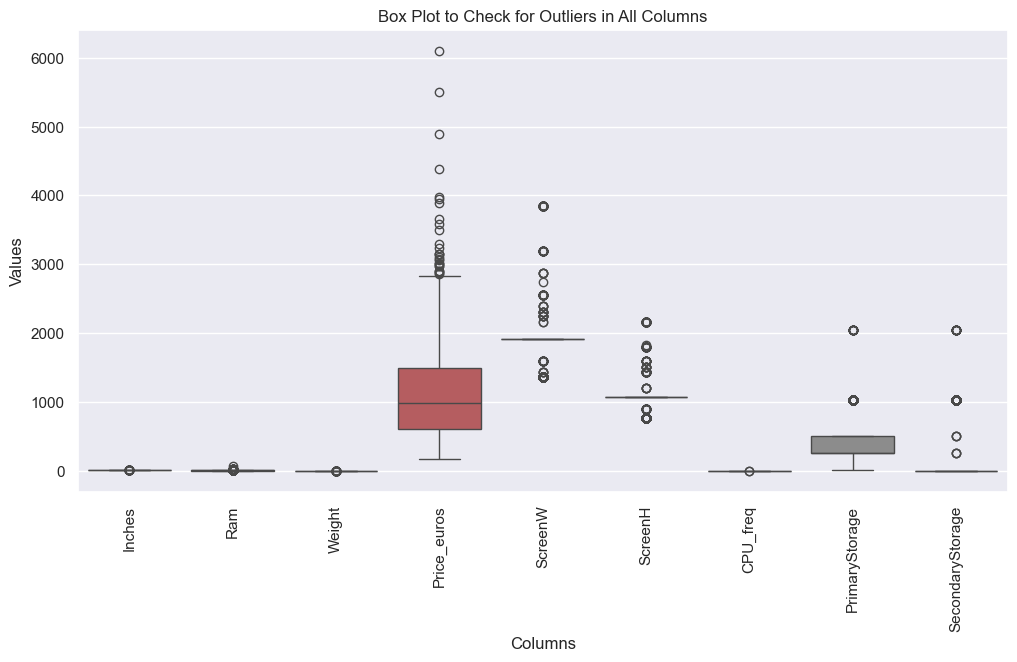

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=a)
plt.title('Box Plot to Check for Outliers in All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

### The box plot highlights outliers in several columns:###

**Significant outliers: Price_euros, ScreenW, ScreenH, and MemoryStorage show numerous outliers beyond the upper whisker.**

**Minimal outliers: Inches, Ram, Weight, and CPU_freq have compact distributions with few or no visible outliers.**

**Outliers are most prominent in pricing, screen dimensions, and storage capacity.**

In [22]:
a.corr(numeric_only=True) #To check the correlation between the variables to identify redundant and neccessary columns.

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
Inches,1.000000,0.241078,0.826638,0.066608,-0.068223,-0.093062,0.305037,0.264280,0.389067
Ram,0.241078,1.000000,0.389370,0.740287,0.424089,0.415241,0.366254,0.015365,0.390939
Weight,0.826638,0.389370,1.000000,0.211883,-0.028605,-0.050106,0.318649,0.175433,0.481495
Price_euros,0.066608,0.740287,0.211883,1.000000,0.552491,0.548529,0.428847,-0.124775,0.291207
ScreenW,-0.068223,0.424089,-0.028605,0.552491,1.000000,0.994069,0.178659,-0.072977,0.146232
ScreenH,-0.093062,0.415241,-0.050106,0.548529,0.994069,1.000000,0.164369,-0.080135,0.135293
CPU_freq,0.305037,0.366254,0.318649,0.428847,0.178659,0.164369,1.000000,0.056320,0.224521
PrimaryStorage,0.264280,0.015365,0.175433,-0.124775,-0.072977,-0.080135,0.056320,1.000000,-0.244182
SecondaryStorage,0.389067,0.390939,0.481495,0.291207,0.146232,0.135293,0.224521,-0.244182,1.000000


# Correlation Insights
**Strongest Price Correlations:**

**RAM (0.74) → More RAM, higher price (key factor).**

**Screen Resolution (0.55) → Higher resolution increases price.**

**CPU Speed (0.42) → Faster CPUs are pricier.**

**Screen Width & Height (0.99 correlation) - Highly correlated, redundant, can drop one.**

**Weight vs. Secondary Storage (0.48) - Heavier laptops tend to have extra storage.**

**Primary Storage & Price (-0.12) - Weak correlation → Not a strong price factor.**

In [24]:
# Drop redundant feature
a.drop(columns=['ScreenH'], inplace=True)

# Verify the updated dataframe
a.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


# Outlier Treatment -IQR METHOD

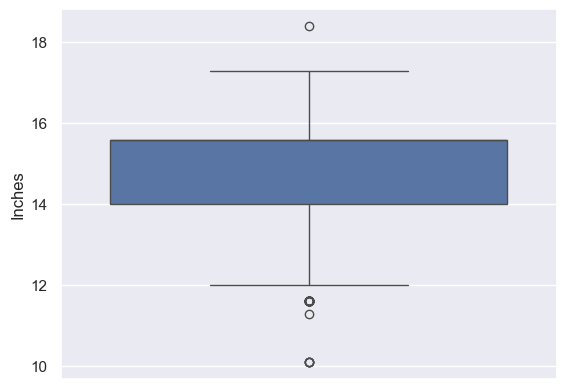

In [26]:
sns.boxplot(y = 'Inches', data=a)
plt.show()

In [27]:
Inches_Q1 = a['Inches'].quantile(0.25)
Inches_Q3 = a['Inches'].quantile(0.75)
Inches_IQR = Inches_Q3 - Inches_Q1
Inches_upper = Inches_Q3 + 1.5 * Inches_IQR
Inches_lower = Inches_Q1 - 1.5 * Inches_IQR
print(f"Inches_upper_bound: {Inches_upper}, Inches_lower_bound: {Inches_lower}")

Inches_upper_bound: 18.0, Inches_lower_bound: 11.600000000000001


In [28]:
a['Inches'] = a['Inches'].clip(lower=Inches_lower, upper=Inches_upper) #clip method

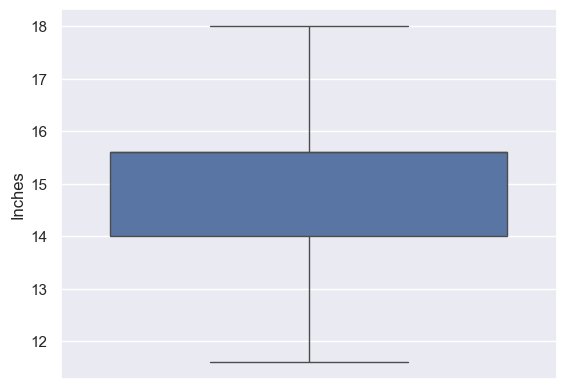

In [29]:
sns.boxplot(y = 'Inches', data=a)
plt.show()

In [30]:
# Ram

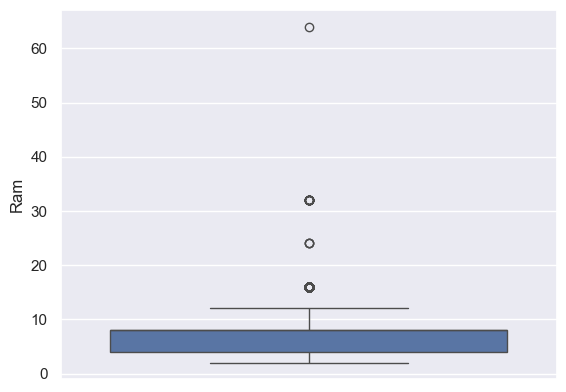

In [31]:
sns.boxplot(y = 'Ram', data=a)
plt.show()

In [32]:
Ram_Q1 = a['Ram'].quantile(0.25)
Ram_Q3 = a['Ram'].quantile(0.75)
Ram_IQR = Ram_Q3 - Ram_Q1
Ram_upper = Ram_Q3 + 1.5 * Ram_IQR
Ram_lower = Ram_Q1 - 1.5 * Ram_IQR
print(f"Ram_upper_bound: {Ram_upper}, Ram_lower_bound: {Ram_lower}")

Ram_upper_bound: 14.0, Ram_lower_bound: -2.0


In [33]:
a['Ram'] = a['Ram'].clip(lower=Ram_lower, upper=Ram_upper) #clip method

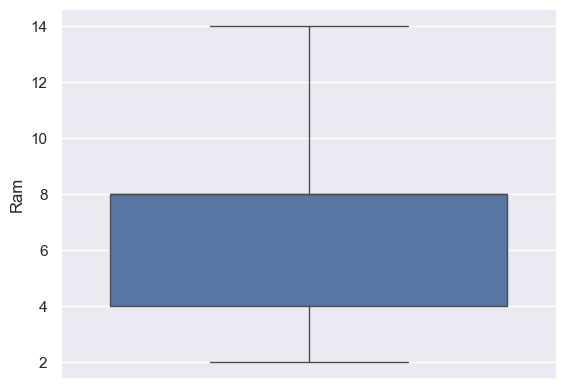

In [34]:
sns.boxplot(y = 'Ram', data=a)
plt.show()

In [35]:
# Weight

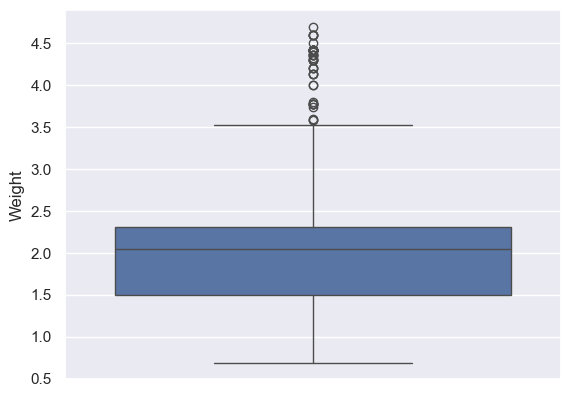

In [36]:
sns.boxplot(y = 'Weight', data=a)
plt.show()

In [37]:
Weight_Q1 = a['Weight'].quantile(0.25)
Weight_Q3 = a['Weight'].quantile(0.75)
Weight_IQR = Weight_Q3 - Weight_Q1
Weight_upper = Weight_Q3 + 1.5 * Weight_IQR
Weight_lower = Weight_Q1 - 1.5 * Weight_IQR
print(f"Weight_upper_bound: {Weight_upper}, Weight_lower_bound: {Weight_lower}")

Weight_upper_bound: 3.5250000000000004, Weight_lower_bound: 0.2849999999999999


In [38]:
a['Weight'] = a['Weight'].clip(lower=Weight_lower, upper=Weight_upper) #clip method

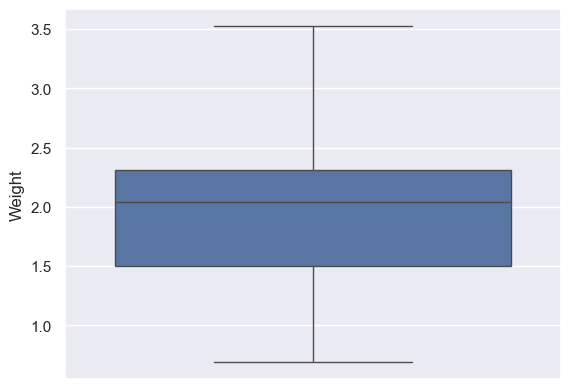

In [39]:
sns.boxplot(y = 'Weight', data=a)
plt.show()

In [40]:
# Price_euros

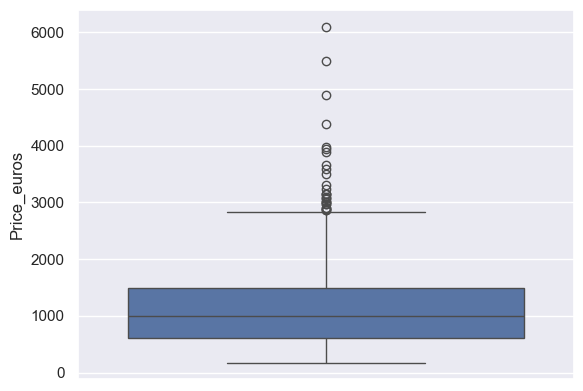

In [41]:
sns.boxplot(y = 'Price_euros', data=a)
plt.show()

In [42]:
Price_euros_Q1 = a['Price_euros'].quantile(0.25)
Price_euros_Q3 = a['Price_euros'].quantile(0.75)
Price_euros_IQR = Price_euros_Q3 - Price_euros_Q1
Price_euros_upper = Price_euros_Q3 + 1.5 * Price_euros_IQR
Price_euros_lower = Price_euros_Q1 - 1.5 * Price_euros_IQR
print(f"Price_euros_upper_bound: {Price_euros_upper}, Price_euros_lower_bound: {Price_euros_lower}")

Price_euros_upper_bound: 2827.75, Price_euros_lower_bound: -722.25


In [43]:
a['Price_euros'] = a['Price_euros'].clip(lower=Price_euros_lower, upper=Price_euros_upper) #clip method

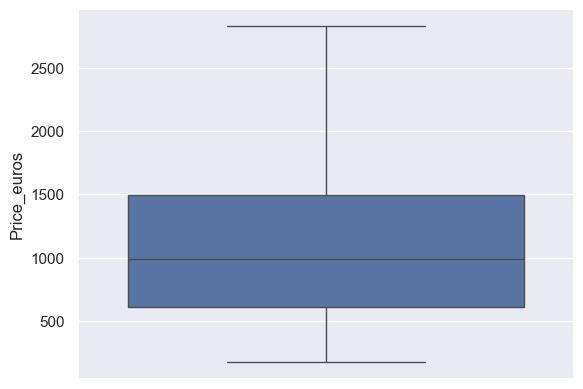

In [44]:
sns.boxplot(y = 'Price_euros', data=a)
plt.show()

In [45]:
#ScreenW

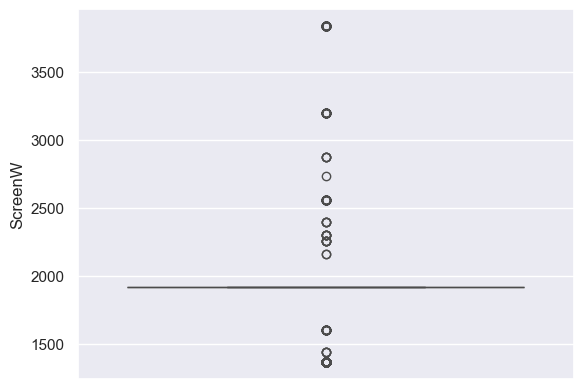

In [46]:
sns.boxplot(y = 'ScreenW', data=a)
plt.show()

In [47]:
ScreenW_Q1 = a['ScreenW'].quantile(0.25)
ScreenW_Q3 = a['ScreenW'].quantile(0.75)
ScreenW_IQR = ScreenW_Q3 - ScreenW_Q1
ScreenW_upper = ScreenW_Q3 + 1.5 * ScreenW_IQR
ScreenW_lower = ScreenW_Q1 - 1.5 * ScreenW_IQR
print(f"ScreenW_upper_bound: {ScreenW_upper}, ScreenW_lower_bound: {ScreenW_lower}")

ScreenW_upper_bound: 1920.0, ScreenW_lower_bound: 1920.0


**Since ScreenW has no variation (both upper and lower bounds are 1920), it’s not an outlier—it’s a constant feature.**

**Final Decision: No need for outlier treatment on ScreenW.** 

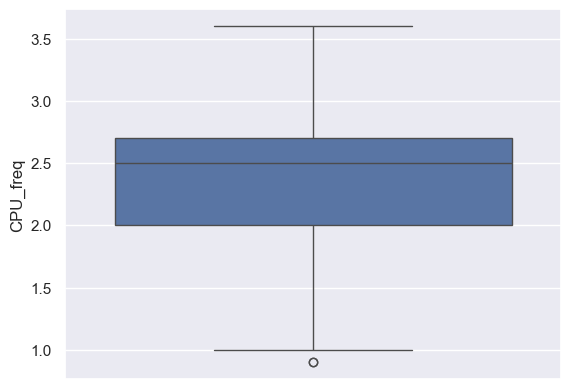

In [49]:
sns.boxplot(y = 'CPU_freq', data=a)
plt.show()

In [50]:
CPU_freqQ1 = a['CPU_freq'].quantile(0.25)
CPU_freqQ3 = a['CPU_freq'].quantile(0.75)
CPU_freqIQR = CPU_freqQ3 - CPU_freqQ1
CPU_frequpper = CPU_freqQ3 + 1.5 * CPU_freqIQR
CPU_freqlower = CPU_freqQ1 - 1.5 * CPU_freqIQR
print(f"CPU_frequpper_bound: {CPU_frequpper}, CPU_freqlower_bound: {CPU_freqlower}")

CPU_frequpper_bound: 3.7500000000000004, CPU_freqlower_bound: 0.9499999999999997


In [51]:
a['CPU_freq'] = a['CPU_freq'].clip(lower=CPU_freqlower, upper=CPU_frequpper) #clip method

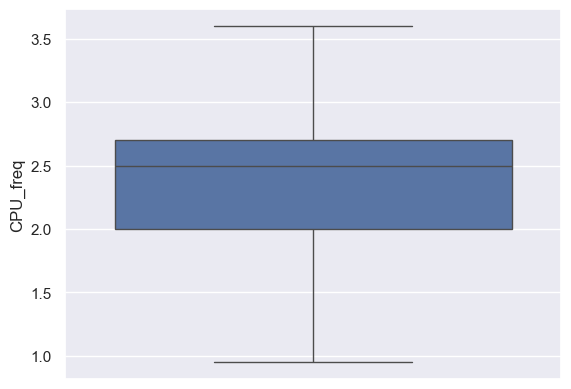

In [52]:
sns.boxplot(y = 'CPU_freq', data=a)
plt.show()

In [53]:
# PrimaryStorage	

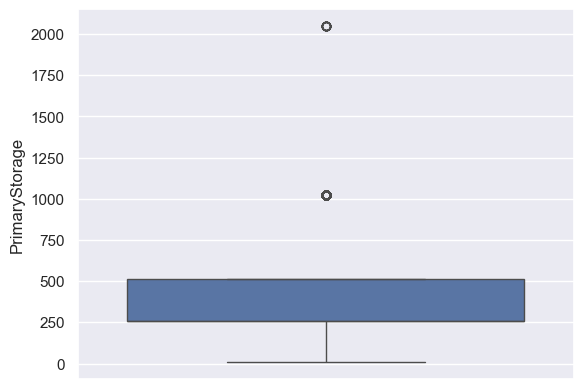

In [54]:
sns.boxplot(y = 'PrimaryStorage', data=a)
plt.show()

In [55]:
PrimaryStorageQ1 = a['PrimaryStorage'].quantile(0.25)
PrimaryStorageQ3 = a['PrimaryStorage'].quantile(0.75)
PrimaryStorageIQR = PrimaryStorageQ3 - PrimaryStorageQ1
PrimaryStorageupper = PrimaryStorageQ3 + 1.5 * PrimaryStorageIQR
PrimaryStoragelower = PrimaryStorageQ1 - 1.5 * PrimaryStorageIQR
print(f"PrimaryStorageupper_bound: {PrimaryStorageupper}, PrimaryStoragelower_bound: {PrimaryStoragelower}")

PrimaryStorageupper_bound: 896.0, PrimaryStoragelower_bound: -128.0


In [56]:
a['PrimaryStorage'] = a['PrimaryStorage'].clip(lower=PrimaryStoragelower, upper=PrimaryStorageupper) #clip method

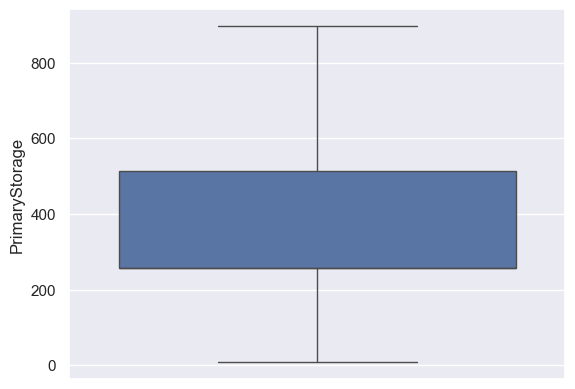

In [57]:
sns.boxplot(y = 'PrimaryStorage', data=a)
plt.show()

In [58]:
# SecondaryStorage

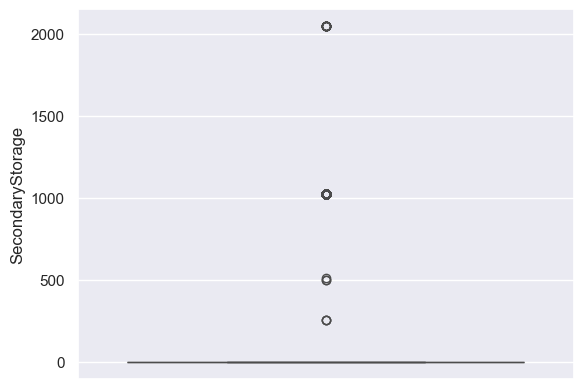

In [59]:
sns.boxplot(y = 'SecondaryStorage', data=a)
plt.show()

In [60]:
SecondaryStorageQ1 = a['SecondaryStorage'].quantile(0.25)
SecondaryStorageQ3 = a['SecondaryStorage'].quantile(0.75)
SecondaryStorageIQR = SecondaryStorageQ3 - SecondaryStorageQ1
SecondaryStorageupper = SecondaryStorageQ3 + 1.5 * SecondaryStorageIQR
SecondaryStoragelower = SecondaryStorageQ1 - 1.5 * SecondaryStorageIQR
print(f"SecondaryStorageupper_bound: {SecondaryStorageupper}, SecondaryStoragelower_bound: {SecondaryStoragelower}")

SecondaryStorageupper_bound: 0.0, SecondaryStoragelower_bound: 0.0


**Since Secondary Storage has no variation (both upper and lower bounds are 0.0), it’s not an outlier—it’s a constant feature.**

**Final Decision: No need for outlier treatment on Secondary Storage.** 

In [62]:
b=a.copy()

In [63]:
print(b.columns.tolist())

['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight', 'Price_euros', 'Screen', 'ScreenW', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model', 'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']


In [64]:
categorical_cols = ['Company', 'TypeName', 'OS', 'Screen', 'Touchscreen', 
                    'IPSpanel', 'RetinaDisplay', 'CPU_company', 
                    'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company']

for col in categorical_cols:
    print(f"{col}: {a[col].nunique()} unique values")

Company: 19 unique values
TypeName: 6 unique values
OS: 9 unique values
Screen: 4 unique values
Touchscreen: 2 unique values
IPSpanel: 2 unique values
RetinaDisplay: 2 unique values
CPU_company: 3 unique values
PrimaryStorageType: 4 unique values
SecondaryStorageType: 4 unique values
GPU_company: 4 unique values


# Encoding

In [66]:
b.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'Touchscreen', 'IPSpanel',
       'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Touchscreen', 'IPSpanel', 'RetinaDisplay', 'Company', 'CPU_company','GPU_company','SecondaryStorageType']:
    b[col] = le.fit_transform(b[col])

In [68]:
# Drop high-cardinality columns
b.drop(['Product', 'CPU_model', 'GPU_model'], axis=1, inplace=True)

** Product:**

This is usually a unique identifier or specific model name like "MacBook Pro 13.3-inch i5 8GB" etc.

It doesn’t help with generalization and can lead to overfitting because each value might occur only once.

** CPU_model and GPU_model: **

These are high-cardinality categorical features, meaning they have many unique values.

In [70]:
# One-Hot Encoding
onehot_cols = ['TypeName', 'OS', 'Screen', 'PrimaryStorageType']
b = pd.get_dummies(b, columns=onehot_cols, drop_first=True)

In [71]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1275 non-null   int32  
 1   Inches                     1275 non-null   float64
 2   Ram                        1275 non-null   int64  
 3   Weight                     1275 non-null   float64
 4   Price_euros                1275 non-null   float64
 5   ScreenW                    1275 non-null   int64  
 6   Touchscreen                1275 non-null   int32  
 7   IPSpanel                   1275 non-null   int32  
 8   RetinaDisplay              1275 non-null   int32  
 9   CPU_company                1275 non-null   int32  
 10  CPU_freq                   1275 non-null   float64
 11  PrimaryStorage             1275 non-null   int64  
 12  SecondaryStorage           1275 non-null   int64  
 13  SecondaryStorageType       1275 non-null   int32

In [72]:
bool_cols = b.select_dtypes(include='bool').columns
b[bool_cols] = b[bool_cols].astype(int)


In [73]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1275 non-null   int32  
 1   Inches                     1275 non-null   float64
 2   Ram                        1275 non-null   int64  
 3   Weight                     1275 non-null   float64
 4   Price_euros                1275 non-null   float64
 5   ScreenW                    1275 non-null   int64  
 6   Touchscreen                1275 non-null   int32  
 7   IPSpanel                   1275 non-null   int32  
 8   RetinaDisplay              1275 non-null   int32  
 9   CPU_company                1275 non-null   int32  
 10  CPU_freq                   1275 non-null   float64
 11  PrimaryStorage             1275 non-null   int64  
 12  SecondaryStorage           1275 non-null   int64  
 13  SecondaryStorageType       1275 non-null   int32

In [74]:
# Exploratory Data Analysis

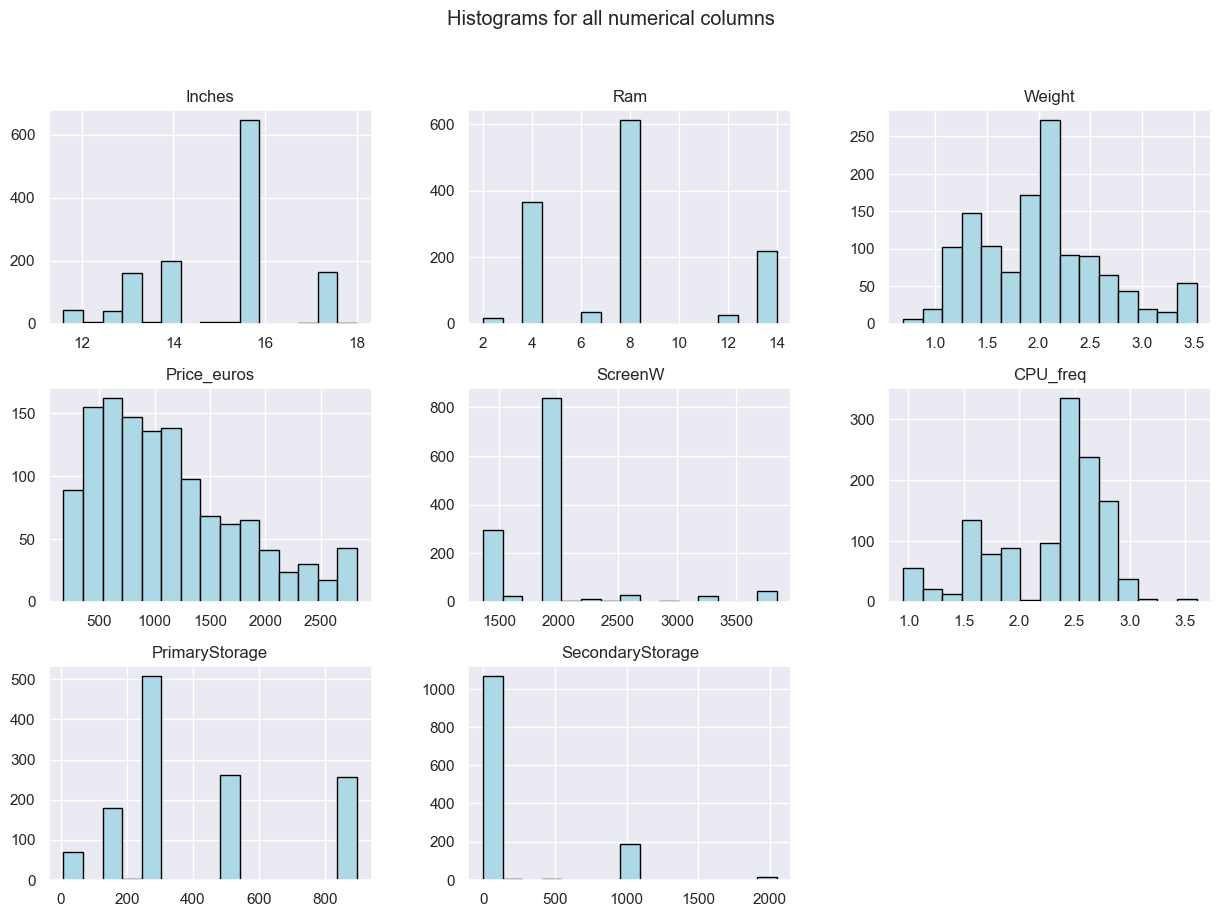

In [75]:
# Univariant Analysis
a.hist(bins=15, figsize=(15, 10), color='lightblue', edgecolor='black')
plt.suptitle('Histograms for all numerical columns')
plt.show()

### Key Insights from Univariant Analysis ###
1. Screen Size and Weight Distribution
Most laptops have 13 to 15-inch screens, indicating standard usage preferences.

Weight is mostly between 1.5 to 2.5 kg, suitable for portability, with a slight right skew toward heavier models.

2. RAM and Performance
The majority of laptops come with 8GB RAM, which is optimal for average consumers and suggests it's the market standard.

A smaller subset offers higher RAM (16GB+), possibly targeting gamers and power users.
3. Price Distribution
Price in euros is right-skewed: most laptops fall under €1500.

A few high-end models go beyond €2000, indicating premium segments with niche buyers.

 4. Screen Resolution
ScreenW (width) is most commonly 1920, aligning with Full HD resolution – a widely adopted standard.

This suggests that display quality is an important feature in consumer decisions.

 5. CPU Frequency
Most laptops have a CPU frequency between 2.0 – 2.7 GHz, reflecting a balance between performance and power efficiency.

Outliers beyond 3.0 GHz are likely specialized high-performance devices.

 6. Storage Configuration
Primary Storage: Peaks at 256GB and 512GB, indicating the shift towards SSDs with moderate capacities.

Secondary Storage: Most laptops don’t have it, but those that do often come with 1TB HDD, likely hybrid systems (SSD + HDD).


In [77]:
# Bivariate Analysis:

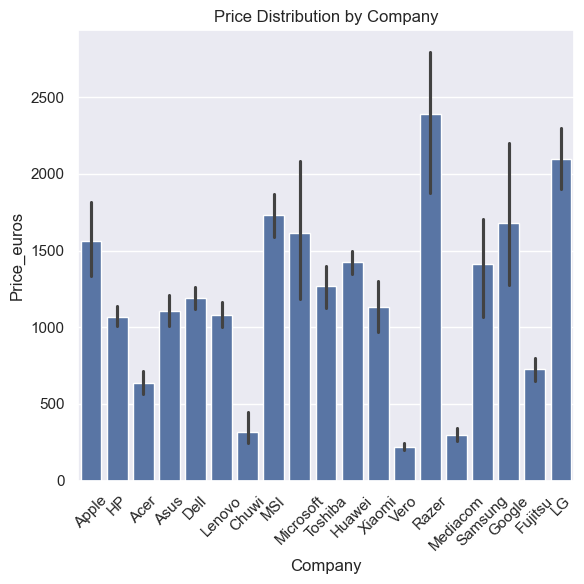

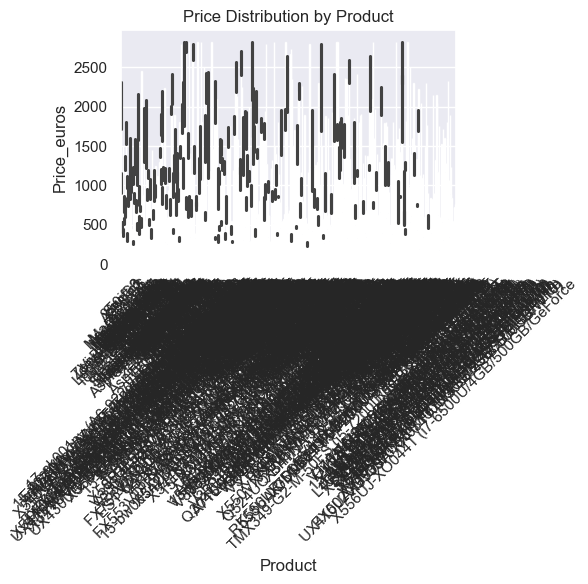

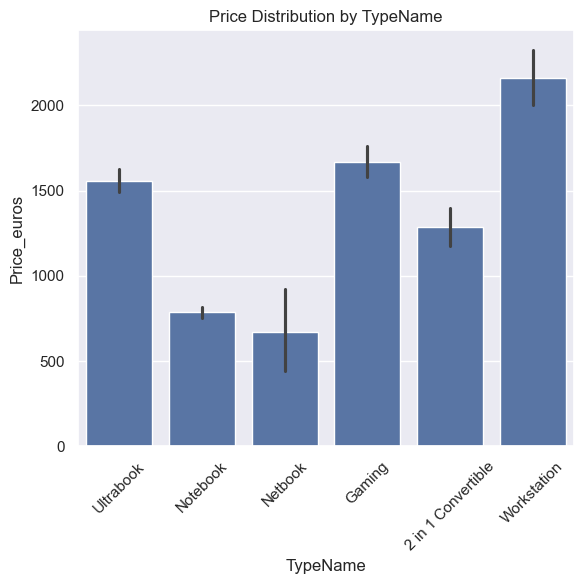

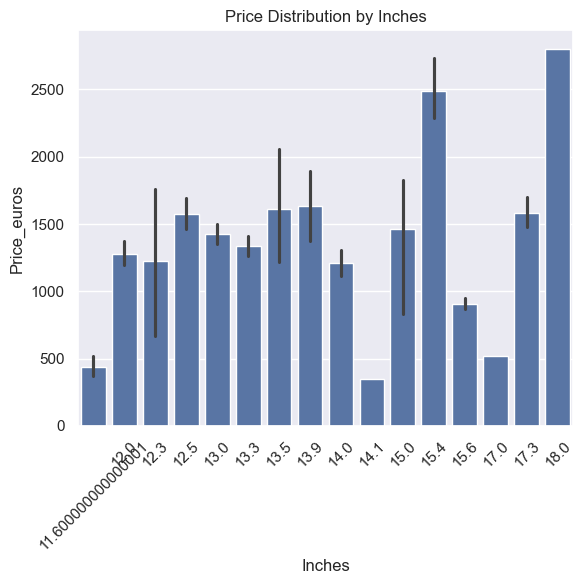

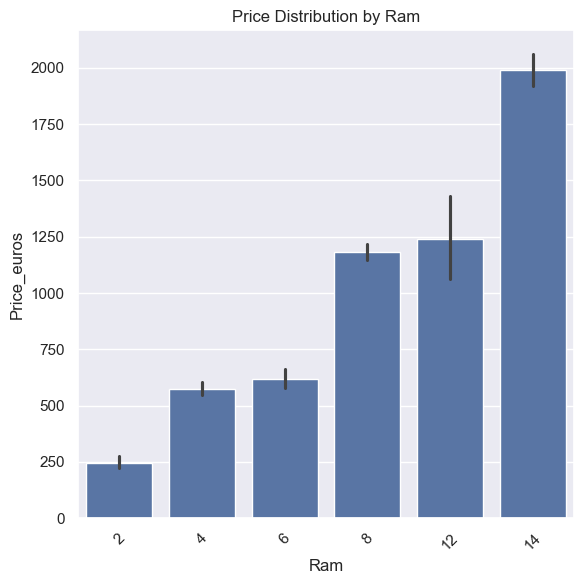

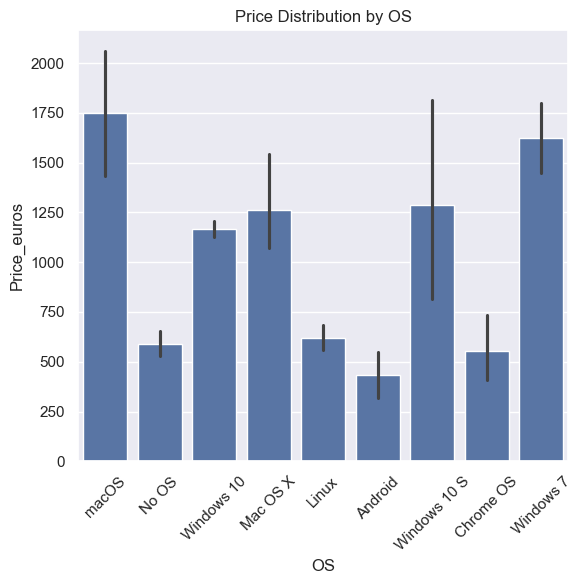

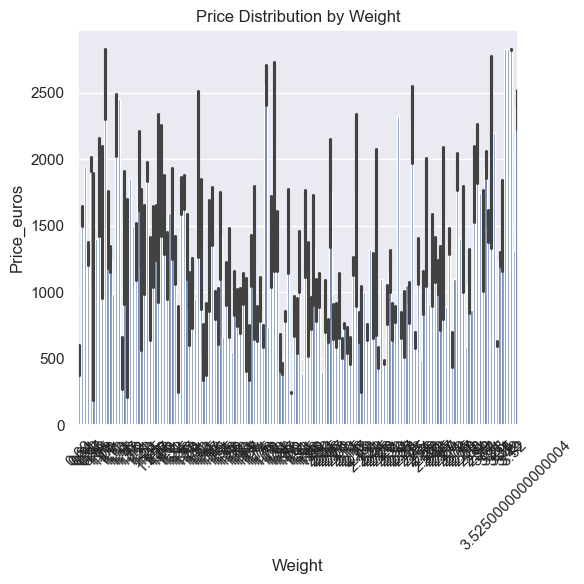

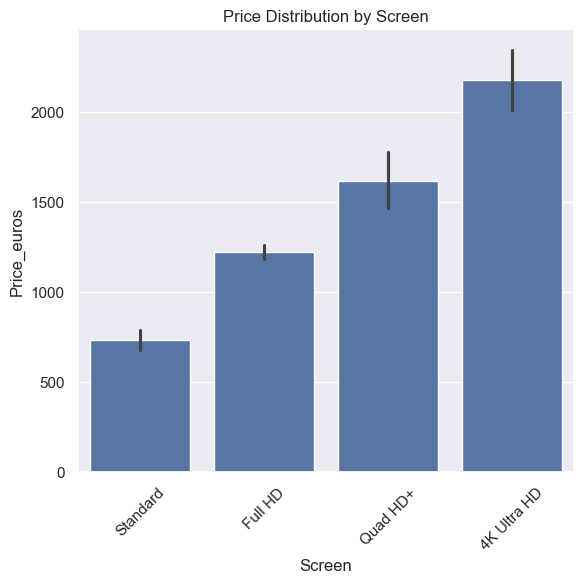

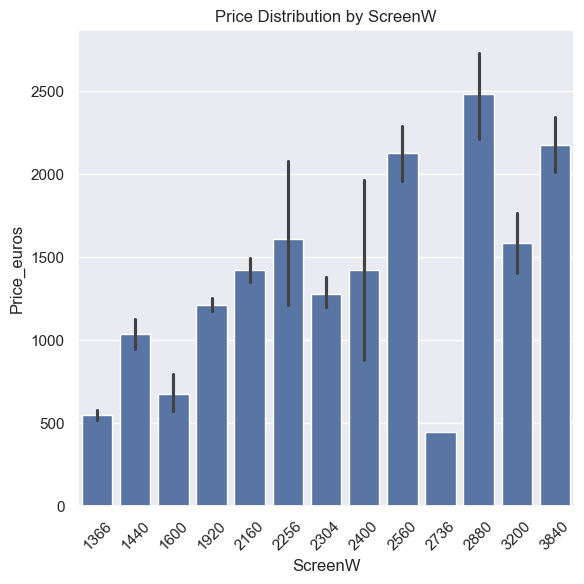

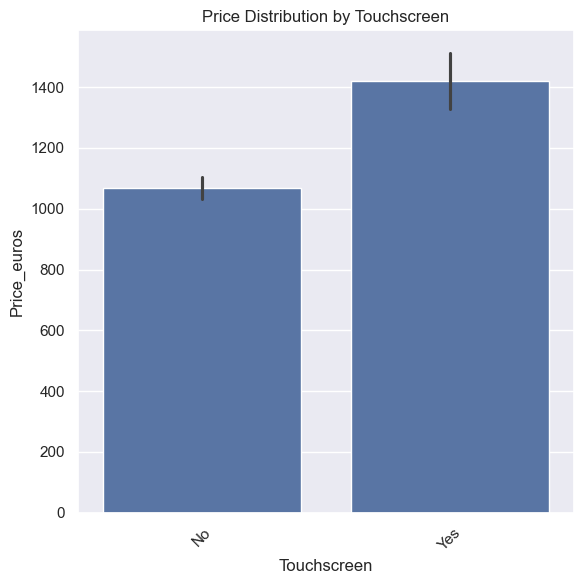

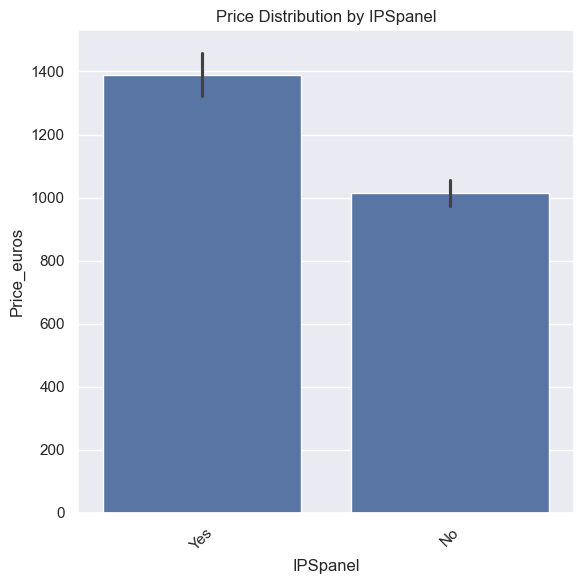

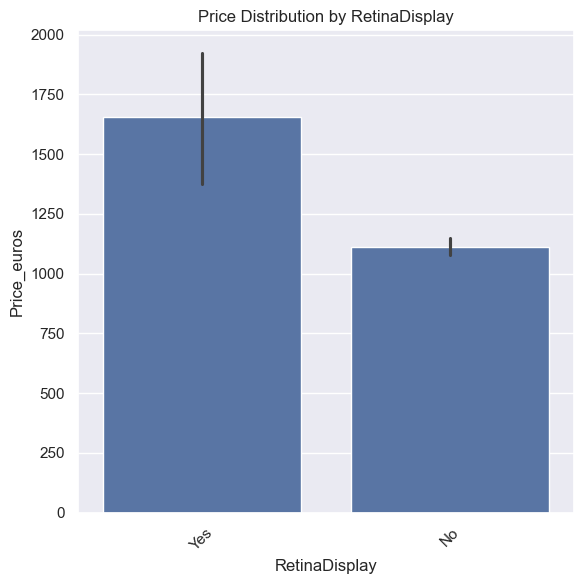

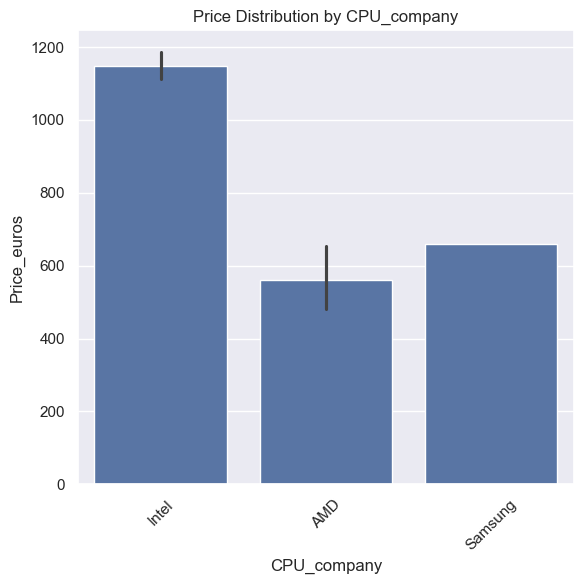

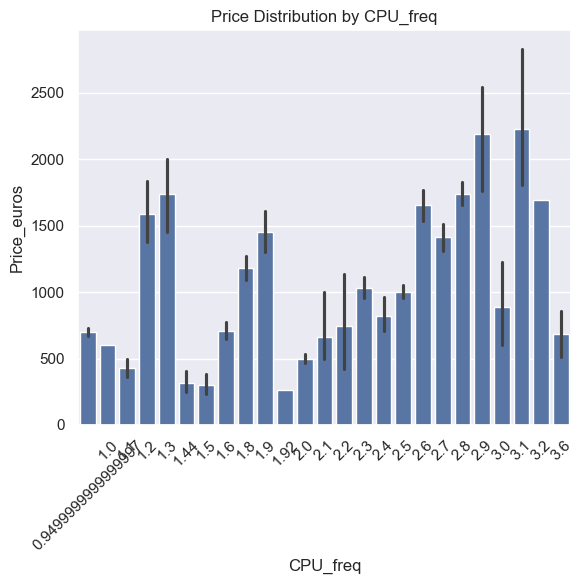

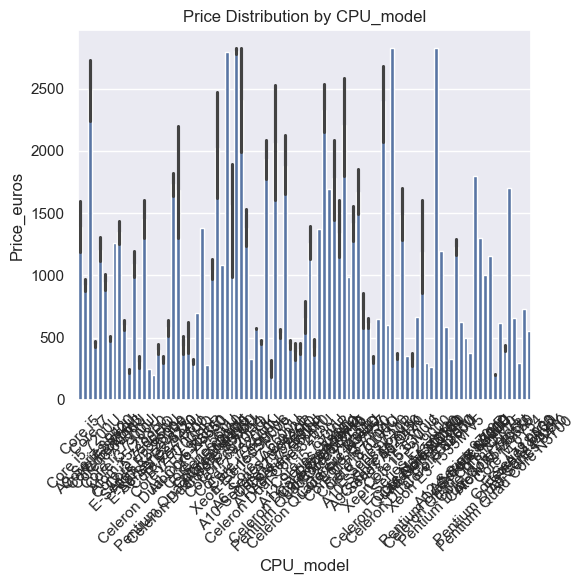

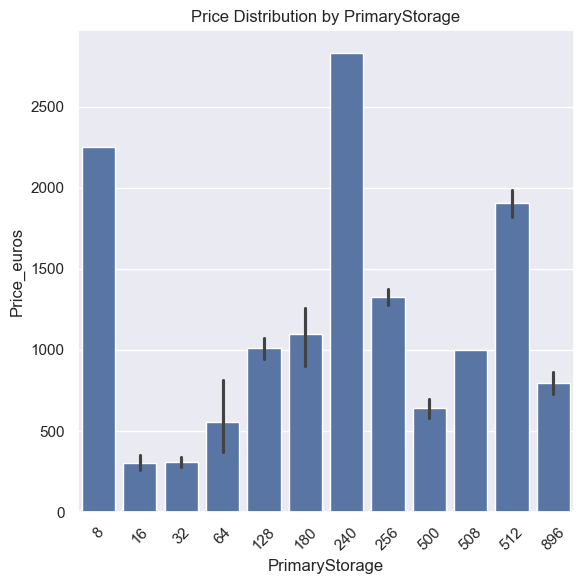

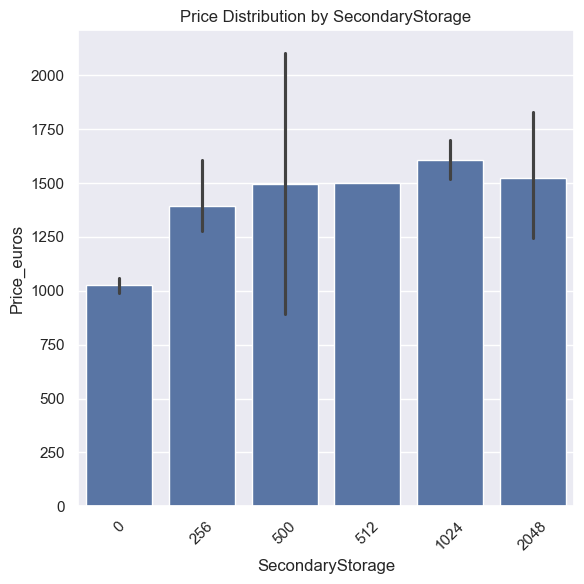

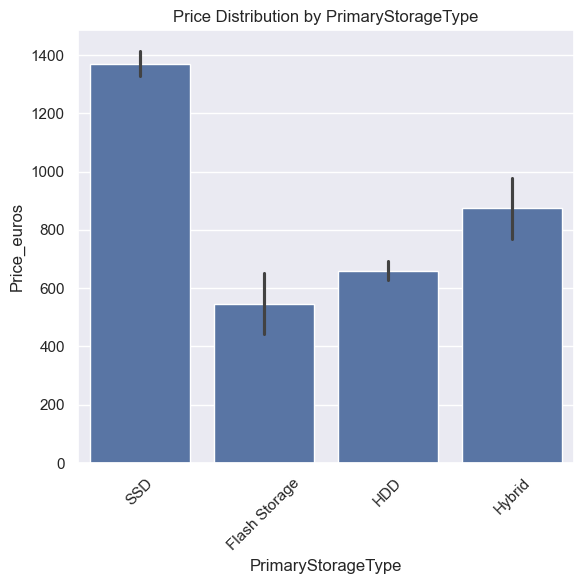

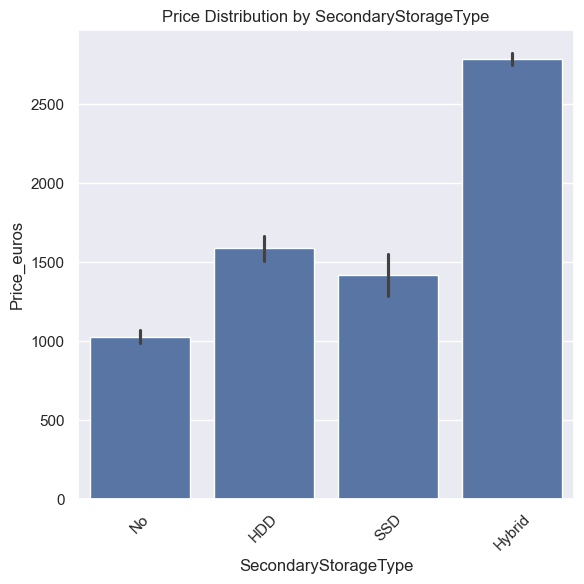

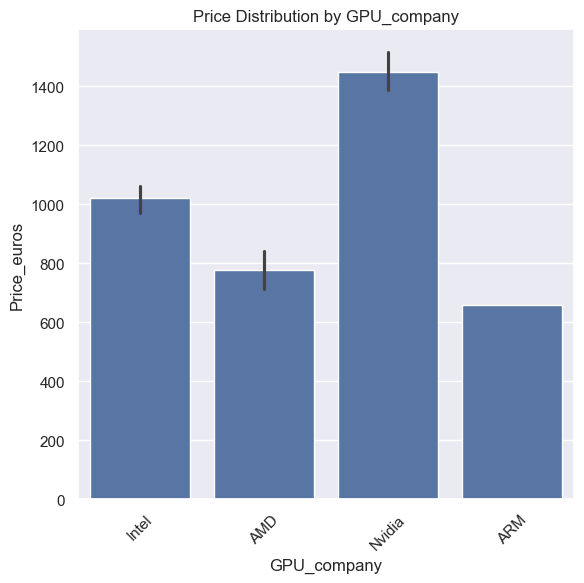

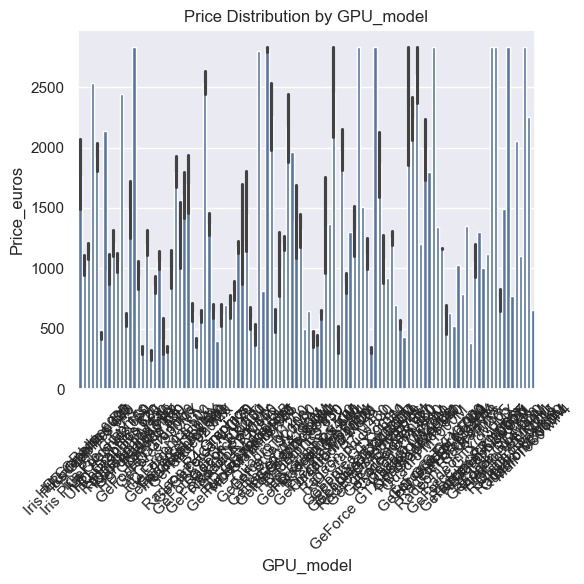

In [78]:
for predictor in a.drop(columns=['Price_euros']).columns:
    plt.figure(figsize=(6, 6))
    sns.barplot(data=a, x=predictor, y='Price_euros')
    plt.title(f'Price Distribution by {predictor}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

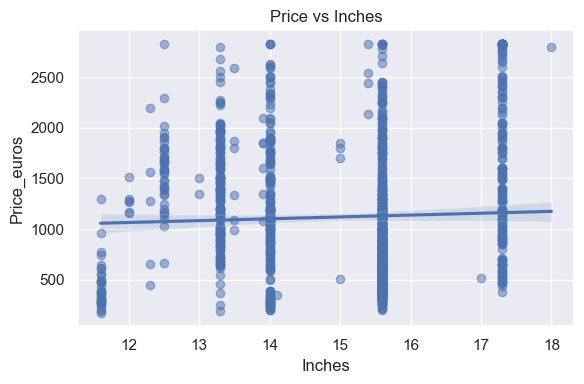

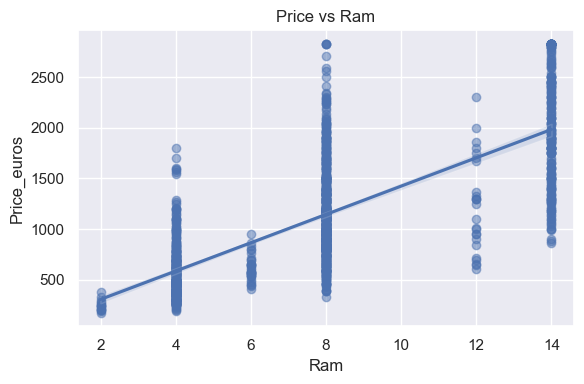

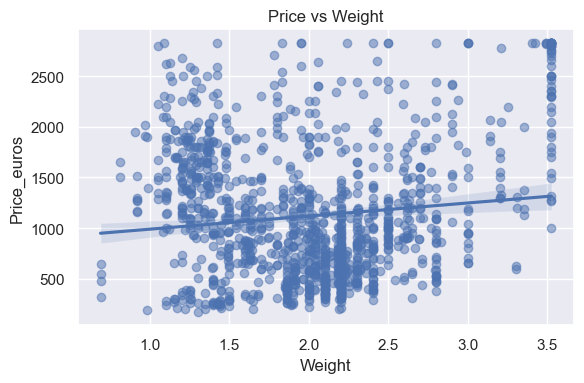

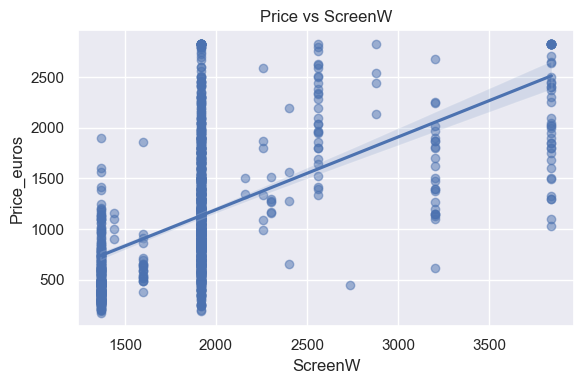

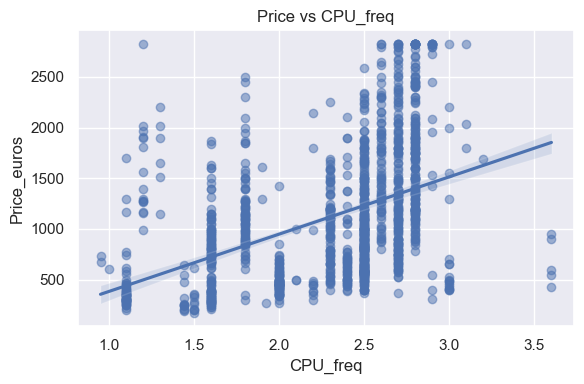

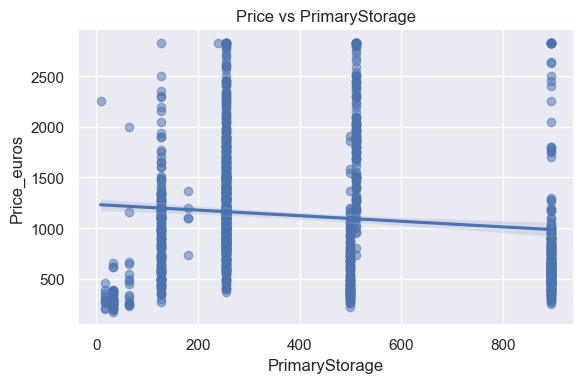

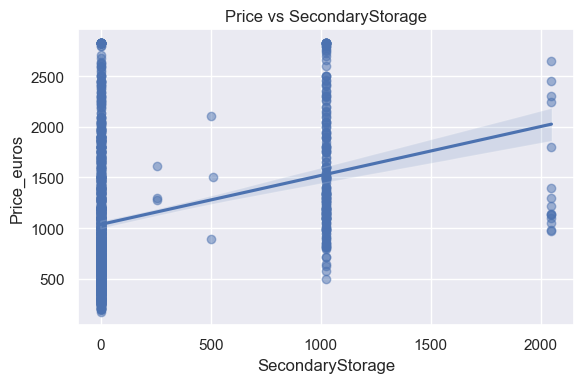

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = a.select_dtypes(include=['float64', 'int64']).drop(columns='Price_euros').columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=a, x=col, y='Price_euros', scatter_kws={'alpha':0.5})
    plt.title(f'Price vs {col}')
    plt.tight_layout()
    plt.show()


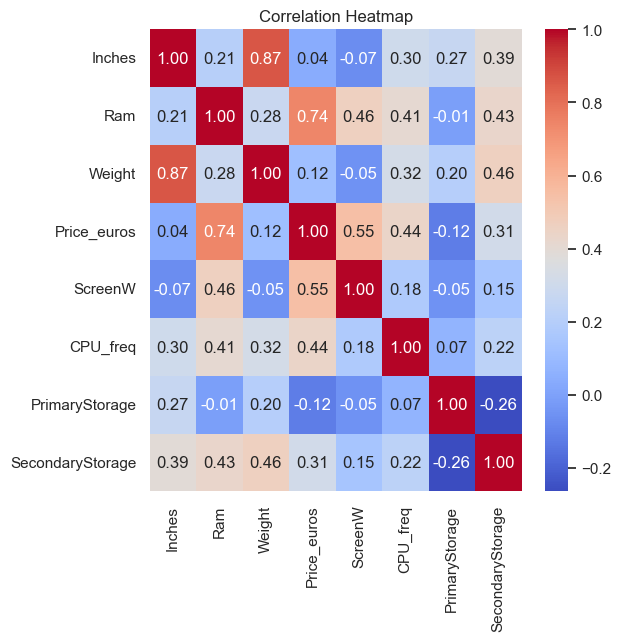

In [80]:
# Multivariate Analysis
numeric_data = a.select_dtypes(include='number')

plt.figure(figsize=(6, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

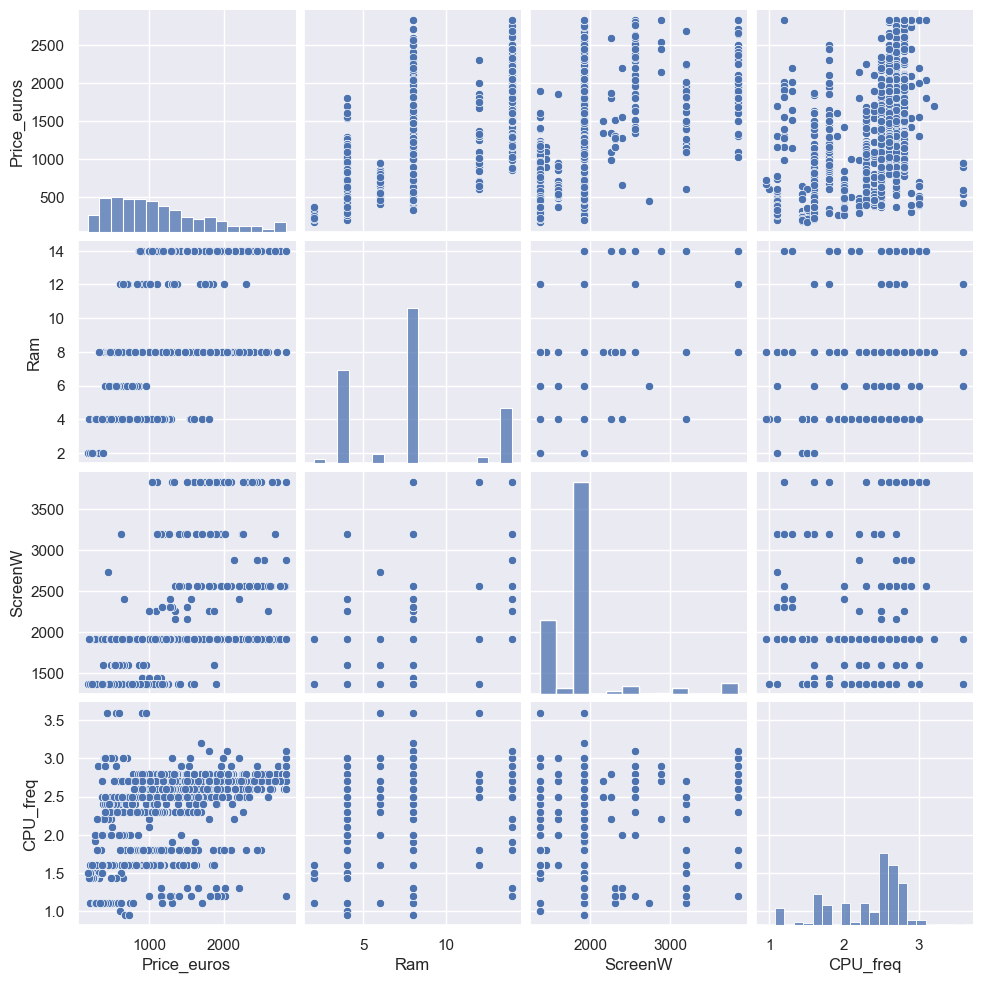

In [81]:
selected_cols = ['Price_euros', 'Ram', 'ScreenW', 'CPU_freq']  
sns.pairplot(a[selected_cols])
plt.show()

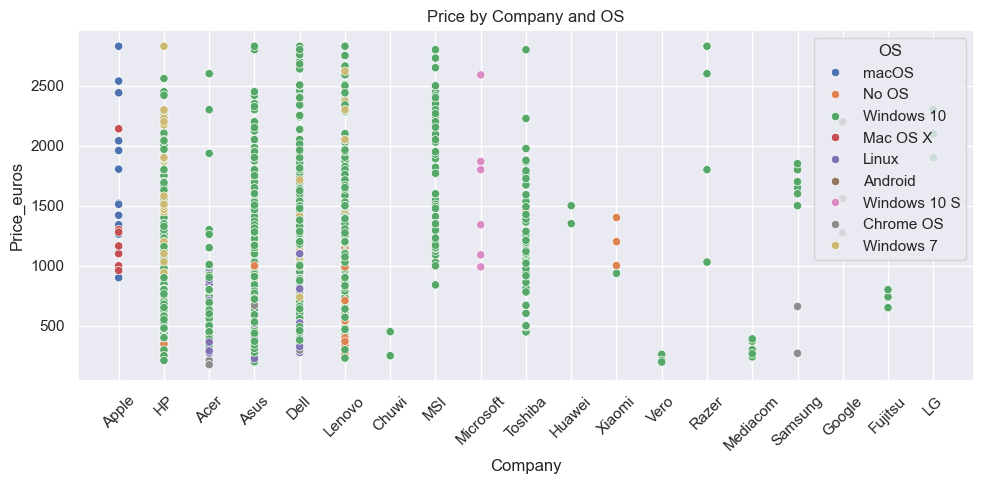

In [82]:
# Example: brand vs price colored by type
plt.figure(figsize=(10, 5))
sns.scatterplot(data=a, x='Company', y='Price_euros', hue='OS')
plt.xticks(rotation=45)
plt.title("Price by Company and OS")
plt.tight_layout()
plt.show()

Price_euros         1.000000
Ram                 0.738656
ScreenW             0.548589
CPU_freq            0.441476
SecondaryStorage    0.311764
Weight              0.119307
Inches              0.040056
PrimaryStorage     -0.118954
Name: Price_euros, dtype: float64


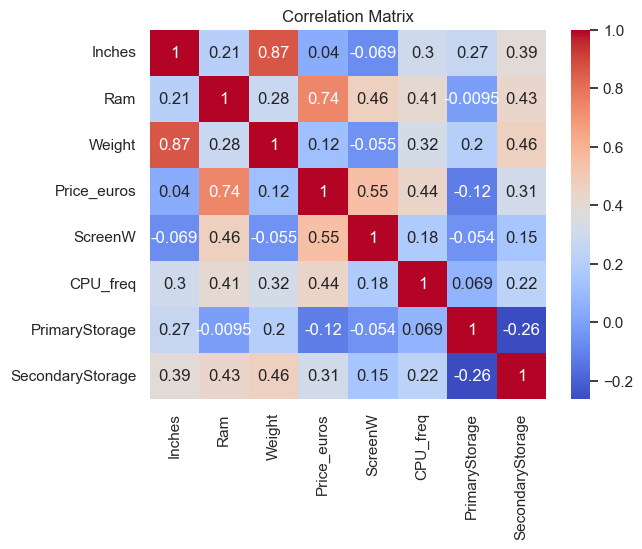

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = a.select_dtypes(include='number')
correlation = numeric_data.corr()['Price_euros'].sort_values(ascending=False)
print(correlation)

# Optional: Plot correlation
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Feature Selection:

In [85]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# One-hot encode categorical features
X_cat = pd.get_dummies(a.select_dtypes(include='object'), drop_first=True)
y = a['Price_euros']

# Apply ANOVA F-test
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_cat, y)

# Display scores
feature_scores = pd.DataFrame({
    'Feature': X_cat.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores.head(10))  # Top 10 important categorical feature

                        Feature       Score
637           TypeName_Notebook  642.309277
750      PrimaryStorageType_SSD  508.402927
748      PrimaryStorageType_HDD  320.321651
650             Screen_Standard  222.613783
635             TypeName_Gaming  205.565847
721    CPU_model_Core i7 7700HQ  170.673026
756          GPU_company_Nvidia  170.065509
778  GPU_model_GeForce GTX 1070  167.224473
752     SecondaryStorageType_No  152.002887
638          TypeName_Ultrabook  113.090848


In [86]:
X_cat.columns

Index(['Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo',
       ...
       'GPU_model_Radeon R7 M440', 'GPU_model_Radeon R7 M445',
       'GPU_model_Radeon R7 M460', 'GPU_model_Radeon R7 M465',
       'GPU_model_Radeon R9 M385', 'GPU_model_Radeon RX 540',
       'GPU_model_Radeon RX 550', 'GPU_model_Radeon RX 560',
       'GPU_model_Radeon RX 580', 'GPU_model_UHD Graphics 620'],
      dtype='object', length=866)

In [87]:
# Select top categorical features from X_cat (already one-hot encoded)
selected_cat = X_cat[['TypeName_Notebook', 'PrimaryStorageType_SSD', 'PrimaryStorageType_HDD',
                      'Screen_Standard', 'TypeName_Gaming', 'CPU_model_Core i7 7700HQ',
                      'GPU_company_Nvidia', 'GPU_model_GeForce GTX 1070', 
                      'SecondaryStorageType_No', 'TypeName_Ultrabook']]

# Select numerical features directly from the original DataFrame
selected_num = ['Ram', 'ScreenW', 'CPU_freq', 'SecondaryStorage']

# Combine both into the final feature set
X_final = pd.concat([a[selected_num], selected_cat], axis=1)

# Target variable
y = a['Price_euros']


In [88]:
X_final.head()

,Ram,ScreenW,CPU_freq,SecondaryStorage,TypeName_Notebook,PrimaryStorageType_SSD,PrimaryStorageType_HDD,Screen_Standard,TypeName_Gaming,CPU_model_Core i7 7700HQ,GPU_company_Nvidia,GPU_model_GeForce GTX 1070,SecondaryStorageType_No,TypeName_Ultrabook
0,8,2560,2.3,0,False,True,False,True,False,False,False,False,True,True
1,8,1440,1.8,0,False,False,False,True,False,False,False,False,True,True
2,8,1920,2.5,0,True,True,False,False,False,False,False,False,True,False
3,14,2880,2.7,0,False,True,False,True,False,False,False,False,True,True
4,8,2560,3.1,0,False,True,False,True,False,False,False,False,True,True


In [89]:
y.head()

0    1339.69
1     898.94
2     575.00
3    2537.45
4    1803.60
Name: Price_euros, dtype: float64

# Feature Scaling - Standardization

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(X_final)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.050587,1.338239,-0.006076,-0.423449,-1.115669,0.723393,-0.626036,1.566935,-0.437709,-0.360997,-0.671202,-0.15523,0.441519,2.360543
1,0.050587,-0.932863,-0.999256,-0.423449,-1.115669,-1.382374,-0.626036,1.566935,-0.437709,-0.360997,-0.671202,-0.15523,0.441519,2.360543
2,0.050587,0.040466,0.391196,-0.423449,0.896323,0.723393,-0.626036,-0.638189,-0.437709,-0.360997,-0.671202,-0.15523,0.441519,-0.423631
3,1.809631,1.987125,0.788468,-0.423449,-1.115669,0.723393,-0.626036,1.566935,-0.437709,-0.360997,-0.671202,-0.15523,0.441519,2.360543
4,0.050587,1.338239,1.583012,-0.423449,-1.115669,0.723393,-0.626036,1.566935,-0.437709,-0.360997,-0.671202,-0.15523,0.441519,2.360543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,-1.122109,0.040466,0.391196,-0.423449,-1.115669,0.723393,-0.626036,-0.638189,-0.437709,-0.360997,-0.671202,-0.15523,0.441519,-0.423631
1271,1.809631,2.636011,0.391196,-0.423449,-1.115669,0.723393,-0.626036,-0.638189,-0.437709,-0.360997,-0.671202,-0.15523,0.441519,-0.423631
1272,-1.708457,-1.082918,-1.396528,-0.423449,0.896323,-1.382374,-0.626036,1.566935,-0.437709,-0.360997,-0.671202,-0.15523,0.441519,-0.423631
1273,-0.535761,-1.082918,0.391196,-0.423449,0.896323,-1.382374,1.597352,1.566935,-0.437709,-0.360997,-0.671202,-0.15523,0.441519,-0.423631


# VIF - Variance Inflation Factor - to check multicollinearity
A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model.

In [93]:
variable = sc_x
variable.shape

(1275, 14)

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i ) for i in range(variable.shape[1])]

vif['Features'] = X_final.columns

In [95]:
vif

,Variance Inflation Factor,Features
0,2.081466,Ram
1,1.572071,ScreenW
2,1.485038,CPU_freq
3,12.861097,SecondaryStorage
4,2.656047,TypeName_Notebook
5,5.202448,PrimaryStorageType_SSD
6,4.682785,PrimaryStorageType_HDD
7,1.602306,Screen_Standard
8,3.690277,TypeName_Gaming
9,1.791442,CPU_model_Core i7 7700HQ


#  VIF Interpretation:
VIF < 5 → No multicollinearity concern.

VIF 5–10 → Moderate multicollinearity.

VIF > 10 → High multicollinearity (may distort model performance).
Feature	VIF	Interpretation
SecondaryStorage	12.86	🚨 High multicollinearity
SecondaryStorageType_No	14.32	🚨 High multicollinearity
PrimaryStorageType_SSD	5.20	⚠️Moderate multicollinearity
PrimaryStorageType_HDD 4.682785	 Acceptable, but nearing concern

In [97]:
# Drop 'SecondaryStorageType_No' due to high VIF
X_final = X_final.drop(columns=['SecondaryStorageType_No','PrimaryStorageType_SSD'])

In [98]:
x=X_final.copy()

#  Model Selection & Training
* Split data (Train-Test Split, 80-20 or 70-30)
* Choose the model based on the problem
* Train the model on the training dataset

In [100]:
from sklearn.model_selection import train_test_split
# Assuming x and y are your independent and dependent variables respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)

# Linear Regression 

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Evaluation
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Train R²: 0.7295639125091364
Test R²: 0.6621171968564459
Train RMSE: 337.98385050677155
Test RMSE: 363.2825753594035


# Order Least Square Method

In [104]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [105]:
# Add a constant to the model for the intercept term
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# Building Linear Regression Model

In [107]:
print(x_train.dtypes)
print(x_test.dtypes)


const                         float64
Ram                             int64
ScreenW                         int64
CPU_freq                      float64
SecondaryStorage                int64
TypeName_Notebook                bool
PrimaryStorageType_HDD           bool
Screen_Standard                  bool
TypeName_Gaming                  bool
CPU_model_Core i7 7700HQ         bool
GPU_company_Nvidia               bool
GPU_model_GeForce GTX 1070       bool
TypeName_Ultrabook               bool
dtype: object
const                         float64
Ram                             int64
ScreenW                         int64
CPU_freq                      float64
SecondaryStorage                int64
TypeName_Notebook                bool
PrimaryStorageType_HDD           bool
Screen_Standard                  bool
TypeName_Gaming                  bool
CPU_model_Core i7 7700HQ         bool
GPU_company_Nvidia               bool
GPU_model_GeForce GTX 1070       bool
TypeName_Ultrabook               boo

In [108]:
# For categorical features, one-hot encode
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

In [109]:
print(x_train.dtypes)
print(x_test.dtypes)

const                         float64
Ram                             int64
ScreenW                         int64
CPU_freq                      float64
SecondaryStorage                int64
TypeName_Notebook                bool
PrimaryStorageType_HDD           bool
Screen_Standard                  bool
TypeName_Gaming                  bool
CPU_model_Core i7 7700HQ         bool
GPU_company_Nvidia               bool
GPU_model_GeForce GTX 1070       bool
TypeName_Ultrabook               bool
dtype: object
const                         float64
Ram                             int64
ScreenW                         int64
CPU_freq                      float64
SecondaryStorage                int64
TypeName_Notebook                bool
PrimaryStorageType_HDD           bool
Screen_Standard                  bool
TypeName_Gaming                  bool
CPU_model_Core i7 7700HQ         bool
GPU_company_Nvidia               bool
GPU_model_GeForce GTX 1070       bool
TypeName_Ultrabook               boo

In [110]:
# Convert boolean columns to integers (True -> 1, False -> 0)
x_train = x_train.astype(int)
x_test = x_test.astype(int)

In [111]:
# Fit the OLS regression model
reg_model = OLS(y_train, x_train).fit()  # Use OLS directly from statsmodels.regression.linear_model

In [112]:
# Print the model summary
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     217.4
Date:                Mon, 05 May 2025   Prob (F-statistic):          1.73e-269
Time:                        14:01:15   Log-Likelihood:                -7401.8
No. Observations:                1020   AIC:                         1.483e+04
Df Residuals:                    1007   BIC:                         1.489e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -223.9278     76.741     -2.918      0.004    -374.518     -73.338
Ram                           87.9869      4.525     19.444      0.000      79.107      96.867
ScreenW                        0.2586      0.027      9.450      0.000       0.205       0.312
CPU_freq                     207.4819     24.556      8.449      0.000     159.295     255.669
SecondaryStorage               0.0018      0.036      0.051      0.960      -0.068       0.071
TypeName_Notebook           -329.8053     35.465     -9.299      0.000    -399.399    -260.211
PrimaryStorageType_HDD      -148.6343     29.234     -5.084      0.000    -206.002     -91.267
Screen_Standard               27.5581     29.349      0.939      0.348     -30.033      85.150
TypeName_Gaming             -264.4606     56.594     -4.673      0.000    -375.517    -153.404
CPU_model_Core i7 7700HQ      76.9850     45.133      1.706      0.088     -11.580     165.550
GPU_company_Nvidia            76.2496     32.470      2.348      0.019      12.532     139.967
GPU_model_GeForce GTX 1070   673.4337     73.337      9.183      0.000     529.524     817.344
TypeName_Ultrabook            74.3626     41.431      1.795      0.073      -6.939     155.664
==============================================================================
Omnibus:                      107.268   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.657
Skew:                           0.716   Prob(JB):                     2.64e-39
Kurtosis:                       4.460   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Key Results:
R-squared: 0.721 (Model explains 72.1% of the variance in the target variable)
Adjusted R-squared: 0.718 (Adjusted for the number of predictors)
F-statistic: 217.4 (Indicates overall model significance)
Prob(F-statistic): 1.73e-269 (Highly significant model)
Log-Likelihood: -7401.8
AIC: 14830.0, BIC: 14890.0 (Model fit criteria)

## Key Coefficients:
Significant Features (p < 0.05):
Ram: 87.99
ScreenW: 0.26
CPU_freq: 207.48
TypeName_Notebook: -329.81
PrimaryStorageType_HDD: -148.63
TypeName_Gaming: -264.46
GPU_model_GeForce GTX 1070: 673.43
GPU_company_Nvidia: 76.25

## Not Statistically Significant (p ≥ 0.05):
SecondaryStorage (p = 0.96)
Screen_Standard (p = 0.35)
CPU_model_Core i7 7700HQ (p = 0.09)
TypeName_Ultrabook (p = 0.073)

## Model Assumptions:
Omnibus test: Significant (p = 0.000), suggesting non-normality of residuals
Durbin-Watson: 1.974 (Close to 2, indicating no significant autocorrelation)
Multicollinearity: High condition number (1.52e+04), could suggest potential multicollinearity.

This summary captures the main points of the model's fit, statistical significance, and diagnostics.

In [114]:
# Dropping non-significant features
x = x.drop(columns=['SecondaryStorage', 'Screen_Standard', 'CPU_model_Core i7 7700HQ', 'TypeName_Ultrabook'])

In [115]:
# Check the data types of the columns in your dataset
print(x.dtypes)

Ram                             int64
ScreenW                         int64
CPU_freq                      float64
TypeName_Notebook                bool
PrimaryStorageType_HDD           bool
TypeName_Gaming                  bool
GPU_company_Nvidia               bool
GPU_model_GeForce GTX 1070       bool
dtype: object


In [116]:
# Convert categorical variables to dummy variables (if any)
x_train = pd.get_dummies(x_train, drop_first=True)


In [117]:
x_train.dtypes

const                         int32
Ram                           int32
ScreenW                       int32
CPU_freq                      int32
SecondaryStorage              int32
TypeName_Notebook             int32
PrimaryStorageType_HDD        int32
Screen_Standard               int32
TypeName_Gaming               int32
CPU_model_Core i7 7700HQ      int32
GPU_company_Nvidia            int32
GPU_model_GeForce GTX 1070    int32
TypeName_Ultrabook            int32
dtype: object

In [118]:
# Convert boolean columns to integers (0 and 1)
x_train = x_train.astype(int)

# Check the data types again
print(x_train.dtypes)

# Add constant to x_train for intercept
x_train_scaled = sm.add_constant(x_train)

# Fit the OLS model
reg_model = OLS(y_train, x_train_scaled).fit()

# Print the summary
print(reg_model.summary())


const                         int32
Ram                           int32
ScreenW                       int32
CPU_freq                      int32
SecondaryStorage              int32
TypeName_Notebook             int32
PrimaryStorageType_HDD        int32
Screen_Standard               int32
TypeName_Gaming               int32
CPU_model_Core i7 7700HQ      int32
GPU_company_Nvidia            int32
GPU_model_GeForce GTX 1070    int32
TypeName_Ultrabook            int32
dtype: object
                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     217.4
Date:                Mon, 05 May 2025   Prob (F-statistic):          1.73e-269
Time:                        14:01:15   Log-Likelihood:                -7401.8
No. Observations:                1020   AIC:

In [119]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha to tune regularization strength

# Fit the model to the training data
ridge_model.fit(x_train, y_train)

# Predict on the test set
y_pred = ridge_model.predict(x_test)

# Evaluate the model's performance
ridge_r2 = r2_score(y_test, y_pred)
ridge_rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the results
print(f"Ridge Regression R-squared: {ridge_r2}")
print(f"Ridge Regression RMSE: {ridge_rmse}")


Ridge Regression R-squared: 0.6568785624027469
Ridge Regression RMSE: 366.0879632936379


In [120]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the Ridge model
ridge = Ridge()

# Set a range of alpha values to test
params = {'alpha': np.logspace(-3, 3, 50)}  # from 0.001 to 1000

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=params, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Get the best model
best_ridge = grid_search.best_estimator_

# Predict using best model
y_pred_ridge = best_ridge.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_ridge)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Best alpha:", grid_search.best_params_['alpha'])
print("Ridge Regression R-squared after tuning:", r2)
print("Ridge Regression RMSE after tuning:", rmse)


Best alpha: 0.3727593720314938
Ridge Regression R-squared after tuning: 0.6570123057197514
Ridge Regression RMSE after tuning: 366.01660868674537


In [121]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [122]:
# Lasso with GridSearchCV
lasso = Lasso(max_iter=10000)
params_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

lasso_grid = GridSearchCV(lasso, params_lasso, cv=5, scoring='r2')
lasso_grid.fit(x_train, y_train)

best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(x_test)

print("Best alpha for Lasso:", lasso_grid.best_params_['alpha'])
print("Lasso R²:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Best alpha for Lasso: 0.001
Lasso R²: 0.657080156962597
Lasso RMSE: 365.98040343716644


In [123]:
# Elastic Net with GridSearchCV
elastic = ElasticNet(max_iter=10000)
params_elastic = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # mix between Lasso (1.0) and Ridge (0.0)
}

elastic_grid = GridSearchCV(elastic, params_elastic, cv=5, scoring='r2')
elastic_grid.fit(x_train, y_train)

best_elastic = elastic_grid.best_estimator_
y_pred_elastic = best_elastic.predict(x_test)

print("Best params for Elastic Net:", elastic_grid.best_params_)
print("Elastic Net R²:", r2_score(y_test, y_pred_elastic))
print("Elastic Net RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_elastic)))


Best params for Elastic Net: {'alpha': 0.001, 'l1_ratio': 0.5}
Elastic Net R²: 0.6569848614914986
Elastic Net RMSE: 366.0312518395314


 Insight:
All three models perform almost identically, with ElasticNet slightly edging out — possibly due to the high l1_ratio, making it behave closer to Lasso.

✅ This suggests that features are all fairly useful and there’s no strong reason to eliminate any yet. Next step could be:

Comparing with tree-based models (like Random Forest or XGBoost).


# Assumptions of Linear Regression you should check:
Linearity
The relationship between predictors and the outcome should be linear.
👉 Use residual plots to check this.

No (or little) multicollinearity
Predictors should not be highly correlated with each other.
👉 Use Variance Inflation Factor (VIF). (Already verified vif)

Homoscedasticity
The residuals should have constant variance.
👉 Plot residuals vs. predicted values.

Normality of residuals
Residuals should be normally distributed.
👉 Use histogram or Q-Q plot.

No autocorrelation of residuals
Mostly relevant for time series.
👉 Use Durbin-Watson test (It is already have it in OLS output: 1.971 ≈ okay).

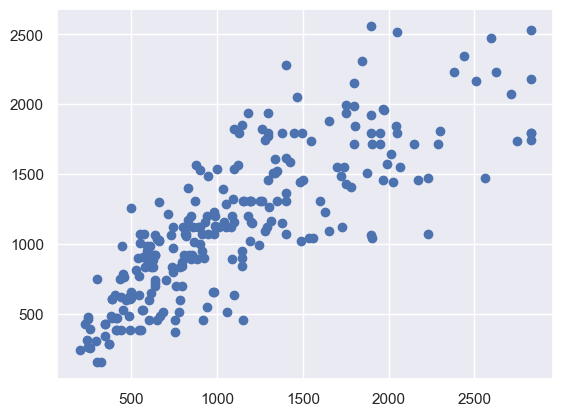

In [126]:
# Check linearity

plt.scatter(y_test, y_pred_test)

# Evaluate Residuals to Check Assumptions
Analyzing residuals helps verify several assumptions: linearity, homoscedasticity (constant variance), and normality.

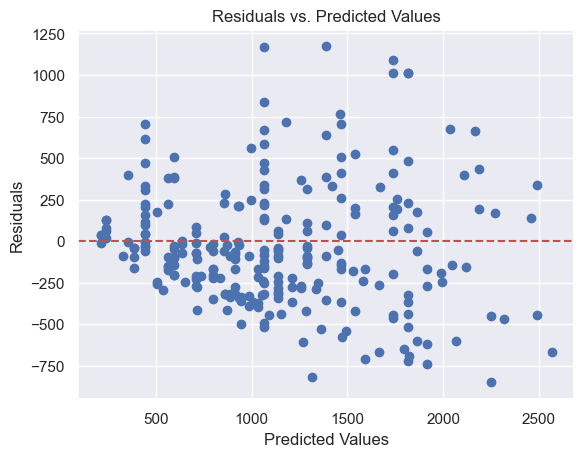

In [128]:
# Residuals vs. Predicted Values Plot 
# This plot checks for linearity and homoscedasticity. A random scatter of points suggests these assumptions hold.
 
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


### Q-Q Plot for Normality

**A Q-Q plot compares the distribution of residuals to a normal distribution. If the points lie on the 45-degree line, the residuals are normally distributed.**


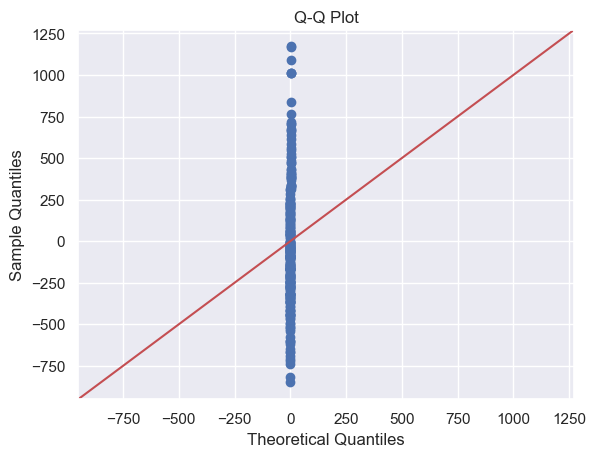

In [130]:
import statsmodels.api as sm

sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()


### Shapiro-Wilk Test for Normality

**This statistical test evaluates the normality of residuals. A p-value greater than 0.05 suggests normality.**


In [132]:
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))


Shapiro-Wilk Test: Statistics=0.966, p=0.000


# Decision tree Regressor

R-squared: 0.7166626591592596
Mean Squared Error: 110061.19554695033


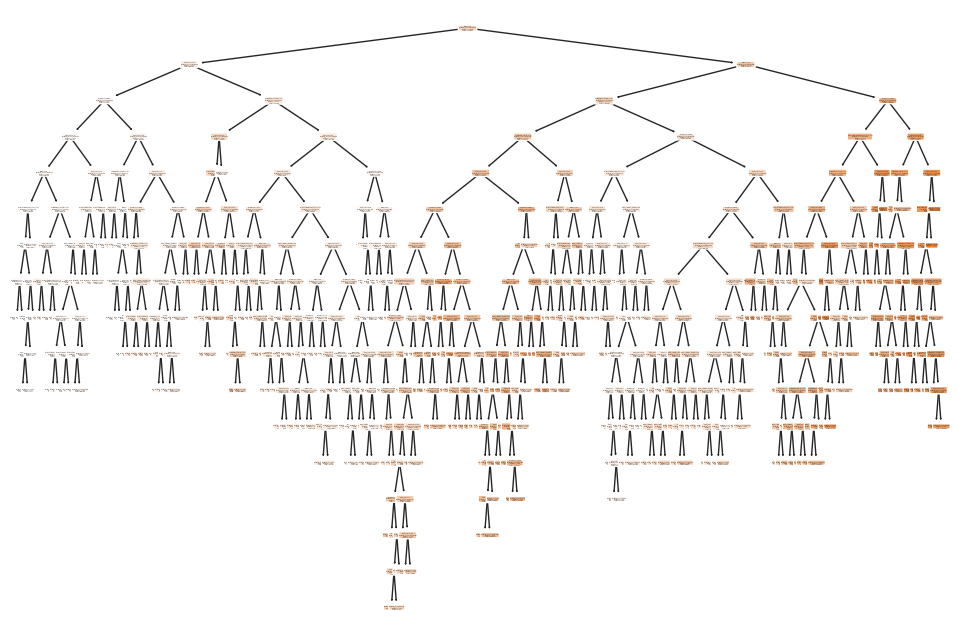

In [134]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# Optionally, visualize the tree (if you're working with a small dataset)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=x.columns, rounded=True, proportion=True)
plt.show()


In [135]:
model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=4) 
#adjust hyperparameters like max_depth, min_samples_split, and min_samples_leaf to prevent overfitting or underfitting.


In [136]:
# Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {-scores.mean()}")


Cross-validation scores: 126499.53668583247


It looks like the cross-validation score (Mean Squared Error) is 126,499.54, which is slightly higher than the previous Mean Squared Error of 110,061.20. This suggests that the model might be overfitting to the training data, and cross-validation is helping reveal this by evaluating performance on multiple splits of the data.

# Hyperparameter Tuning:
tuning hyperparameters such as max_depth, min_samples_split, and min_samples_leaf can help reduce overfitting

In [139]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [140]:
# Let's train the model with these optimized parameters and evaluate its performance:
# Initialize the Decision Tree Regressor with the best parameters
model_optimized = DecisionTreeRegressor(
    max_depth=10, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    random_state=42
)

# Train the model
model_optimized.fit(x_train, y_train)

# Make predictions on the test data
y_pred_optimized = model_optimized.predict(x_test)

# Evaluate the model
r2_optimized = r2_score(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)

print(f"Optimized R-squared: {r2_optimized}")
print(f"Optimized Mean Squared Error: {mse_optimized}")



Optimized R-squared: 0.7142581416126501
Optimized Mean Squared Error: 110995.22025088871


Interpretation:
R-squared is almost the same, indicating that the model's ability to explain the variance in the data is not significantly improved with the new hyperparameters.

The Mean Squared Error (MSE) has only a slight increase, suggesting that the changes made to the hyperparameters didn’t result in a huge performance boost.

# Random Forest Regressor

In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest R-squared: {r2_rf}")
print(f"Random Forest Mean Squared Error: {mse_rf}")


Random Forest R-squared: 0.7398125431662472
Random Forest Mean Squared Error: 101068.72070045833


The Random Forest model gives the following results:

R-squared: 0.74, which is an improvement compared to the Decision Tree model's R-squared (0.71). This indicates the model explains more variance in the data.

Mean Squared Error (MSE): 101,068.72, which is a decrease from both the Decision Tree (110,061.20) and optimized Decision Tree (110,995.22), indicating that the Random Forest model is making more accurate predictions.

Conclusion:
Random Forest outperforms both the simple and optimized Decision Tree models in terms of both R-squared and MSE.

The improvement in R-squared shows that Random Forest better captures the underlying patterns in the data, while the decrease in MSE reflects better accuracy.

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for splitting
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

Best parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: -93438.9658832452


In [147]:
# Train the model with best parameters
best_rf = RandomForestRegressor(
    max_depth=10,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

# Fit on training data
best_rf.fit(x_train, y_train)

# Predict on test set
y_pred = best_rf.predict(x_test)

# Evaluate
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Optimized Random Forest R-squared: {r2}")
print(f"Optimized Random Forest Mean Squared Error: {mse}")


Optimized Random Forest R-squared: 0.7673972298244744
Optimized Random Forest Mean Squared Error: 90353.56546047538


## Interpretation:
**This confirms that linear regression assumptions were violated, and a non-linear model like Random Forest handles the complexity of the data better. Decision trees and random forests don’t assume linearity, homoscedasticity, or normality of residuals — hence they perform better when such assumptions fail.**

In [149]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Step 1: Split your data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Initialize and train
xgb = XGBRegressor(random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)

# Step 3: Predictions and evaluation
y_pred = xgb.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("XGBoost R-squared:", r2)
print("XGBoost Mean Squared Error:", mse)


XGBoost R-squared: 0.7446391559289108
XGBoost Mean Squared Error: 99193.84332099033


## XGBoost Regressor is performing well, and it's slightly better than the baseline Random Forest model you used earlier:

📊 Model Comparison:
Model	             R² Score	   Mean Squared Error
Decision Tree	     ~0.71	   ~110,000
Random Forest	     ~0.74	   ~101,000
XGBoost	             ~0.745    ~99,000
Tuned Random Forest  ~0.767    ~90,353

In [151]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate best model
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)
print("Optimized XGBoost R-squared:", r2_score(y_test, y_pred_best))
print("Optimized XGBoost Mean Squared Error:", mean_squared_error(y_test, y_pred_best))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation score: -91604.04307021743
Optimized XGBoost R-squared: 0.7699987673341508
Optimized XGBoost Mean Squared Error: 89343.00918248676


# Conclusion:
After testing and fine-tuning multiple models, XGBoost Regressor emerged as the best-performing model for predicting Laptop prices.

# Initial Performance:

**XGBoost achieved a solid R-squared of 0.7446 and a Mean Squared Error of 99,193 in its base form.**

# Optimized Performance:

**After hyperparameter tuning, XGBoost improved significantly, with R-squared rising to 0.7700 and Mean Squared Error dropping to 89,343.**

# Comparison:

**XGBoost (Optimized) outperformed both Random Forest and Decision Tree models in terms of accuracy (R²) and error (MSE), achieving the best overall results.**

# This suggests that CPU frequency has approximately twice the predictive power of screen width, and is significantly more important than all other features in the model. Hardware specifications (CPU, screen, RAM) appear to be the most influential factors overall, while the categorical features like device type and GPU brand have moderate importance.